In [38]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.iloc[:, : -1]) # Had to ignore species column

pd.DataFrame(data_scaled)

pd.DataFrame(data_scaled).describe()

,0,1,2,3,4
count,150.000000,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,0.000000,-4.736952e-16,-6.631732e-16,3.315866e-16,-2.842171e-16
std,1.003350,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.720542,-1.870024e+00,-2.438987e+00,-1.568735e+00,-1.444450e+00
25%,-0.860271,-9.006812e-01,-5.877635e-01,-1.227541e+00,-1.181504e+00
50%,0.000000,-5.250608e-02,-1.249576e-01,3.362659e-01,1.332259e-01
75%,0.860271,6.745011e-01,5.692513e-01,7.627586e-01,7.905908e-01
max,1.720542,2.492019e+00,3.114684e+00,1.786341e+00,1.710902e+00


Text(0, 0.5, 'Inertia')

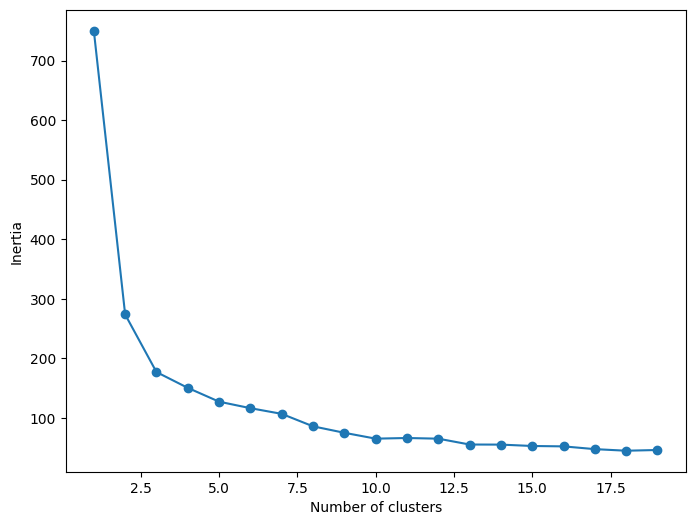

In [4]:
SSE = []
for cluster in range(1, 20):
    kmeans = KMeans(n_clusters=cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

frame = pd.DataFrame({ 'Cluster': range(1, 20), 'SSE': SSE })
plt.figure(figsize=(8, 6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [ ]:
# 3 - 4 are the best cluster values
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(data_scaled)
prediction = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['Cluster'] = prediction
frame['Cluster'].value_counts()

Cluster
0    53
1    50
2    47
Name: count, dtype: int64

# Q2

In [10]:
hand_digits = load_digits()
hand_digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [ ]:
hand_digits['target']

array([0, 1, 2, ..., 8, 9, 8])

In [27]:
df = pd.DataFrame(data=hand_digits.data, columns=hand_digits.feature_names)
df['number_label'] = hand_digits.target

In [29]:
pixels = df.drop(columns=['number_label'])
pixels.columns

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
      dtype='object')

In [ ]:
first_row = pixels.iloc[0]
first_row_array = first_row.to_numpy()
first_row_array = first_row_array.reshape((8, 8))

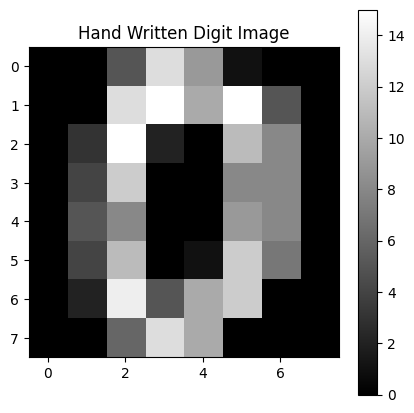

In [35]:
plt.figure(figsize=(5,5))
plt.imshow(first_row_array, cmap='gray')
plt.colorbar()
plt.title("Hand Written Digit Image")
plt.show()

In [36]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pixels)

In [37]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

np.sum(pca.explained_variance_ratio_)

np.float64(0.2159497050083281)

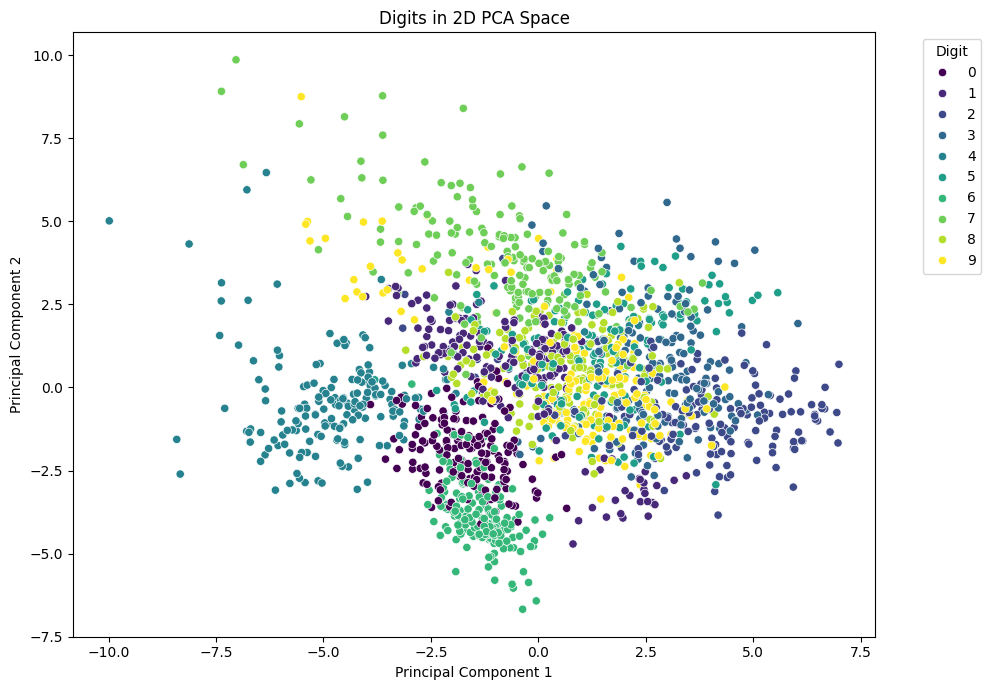

In [39]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['number_label'] = df['number_label']

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='number_label', palette='viridis', legend='full')
plt.title('Digits in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()